In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
f = r.TFile("./data/Hists_DeltaE_vs_Time_By_EnergyRange_60hUnblinding.root")
f.ls()

TFile**		./data/Hists_DeltaE_vs_Time_By_EnergyRange_60hUnblinding.root	
 TFile*		./data/Hists_DeltaE_vs_Time_By_EnergyRange_60hUnblinding.root	
  KEY: TH2D	h1;300	#deltaE/E_{west} For 100 < E_{west} < 200
  KEY: TH2D	h2;300	#deltaE/E_{west} For 200 < E_{west} < 300
  KEY: TH2D	h3;300	#deltaE/E_{west} For 300 < E_{west} < 400
  KEY: TH2D	h4;300	#deltaE/E_{west} For 400 < E_{west} < 500
  KEY: TH2D	h5;300	#deltaE/E_{west} For 500 < E_{west} < 600
  KEY: TH2D	h6;300	#deltaE/E_{west} For 600 < E_{west} < 700
  KEY: TH2D	h7;300	#deltaE/E_{west} For 700 < E_{west} < 800
  KEY: TH2D	h8;300	#deltaE/E_{west} For 800 < E_{west} < 900
  KEY: TH2D	h9;300	#deltaE/E_{west} For 900 < E_{west} < 1000
  KEY: TH2D	h10;300	#deltaE/E_{west} For 1000 < E_{west} < 1100
  KEY: TH2D	h11;300	#deltaE/E_{west} For 1100 < E_{west} < 1200
  KEY: TH2D	h12;300	#deltaE/E_{west} For 1200 < E_{west} < 1300
  KEY: TH2D	h13;300	#deltaE/E_{west} For 1300 < E_{west} < 1400
  KEY: TH2D	h14;300	#deltaE/E_{west} For 1400 < E_

1 <ROOT.TH2D object ("h1") at 0x7fffe2d19cb0>
2 <ROOT.TH2D object ("h2") at 0x7fffe305dec0>
3 <ROOT.TH2D object ("h3") at 0x7fffe2db2530>
4 <ROOT.TH2D object ("h4") at 0x7fffe3042360>
5 <ROOT.TH2D object ("h5") at 0x7fffe2f5e6c0>
6 <ROOT.TH2D object ("h6") at 0x7fffe3090020>
7 <ROOT.TH2D object ("h7") at 0x7fffe3085280>
8 <ROOT.TH2D object ("h8") at 0x7fffe3092010>
9 <ROOT.TH2D object ("h9") at 0x7fffe3091bc0>
10 <ROOT.TH2D object ("h10") at 0x7fffe3092420>
11 <ROOT.TH2D object ("h11") at 0x7fffe30ac080>
12 <ROOT.TH2D object ("h12") at 0x7fffe30acdf0>
13 <ROOT.TH2D object ("h13") at 0x7fffe30ac880>
14 <ROOT.TH2D object ("h14") at 0x7fffe3088390>
15 <ROOT.TH2D object ("h15") at 0x7fffe3087f40>
16 <ROOT.TH2D object ("h16") at 0x7fffe30887a0>
17 <ROOT.TH2D object ("h17") at 0x7fffe308a550>
18 <ROOT.TH2D object ("h18") at 0x7fffe3089f80>
19 <ROOT.TH2D object ("h19") at 0x7fffe30a8010>
20 <ROOT.TH2D object ("h20") at 0x7fffe30a7bc0>
21 <ROOT.TH2D object ("h21") at 0x7fffe30a9930>
22 <ROOT.T

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/001_deltaE_vs_t.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/002_deltaE_vs_t.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/003_deltaE_vs_t.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/004_deltaE_vs_t.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/005_deltaE_vs_t.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/006_deltaE_vs_t.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png f

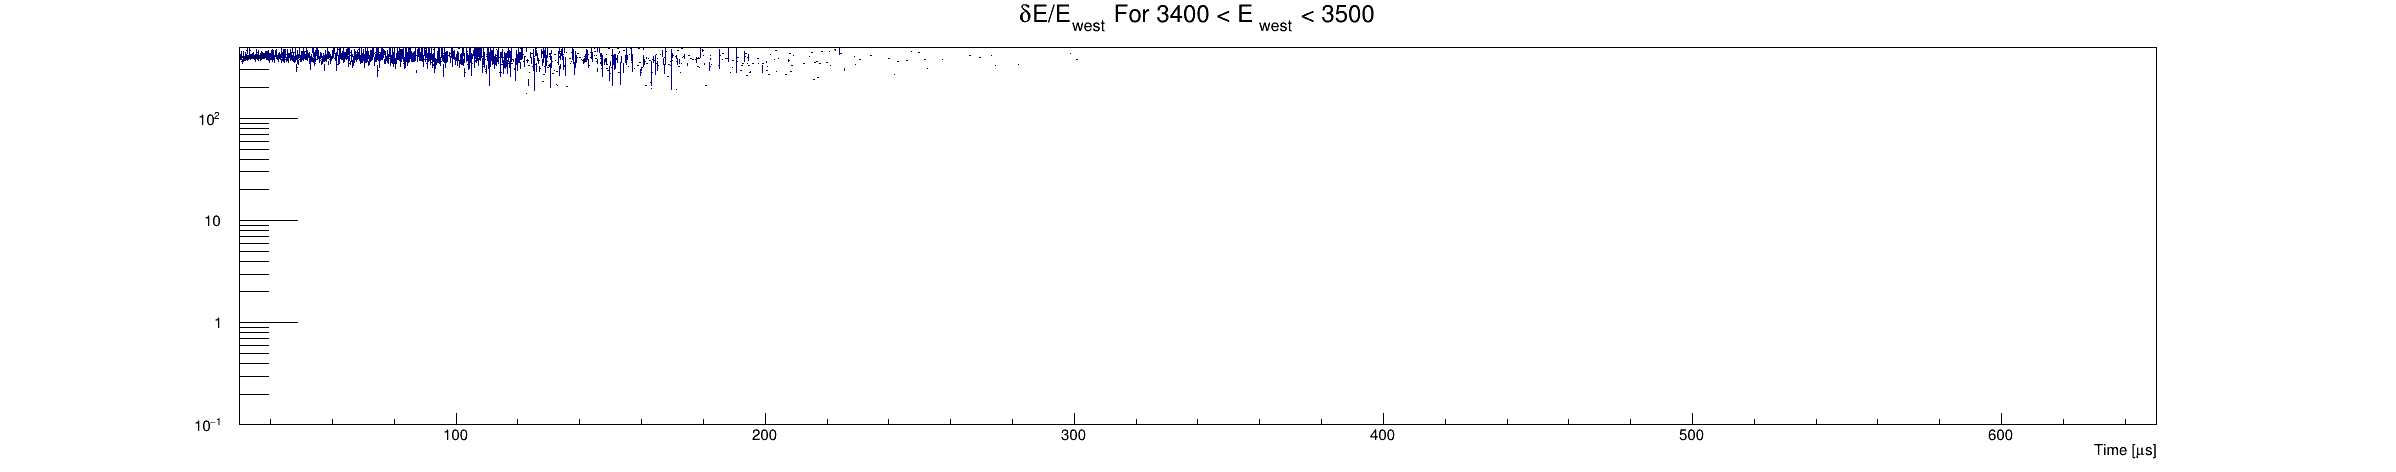

In [7]:
for elow in range(1,35):
    try:
        print(elow, f.Get("h"+str(elow)))
    except:
        print("Error: h"+str(elow)+" not found")
        
    hi = f.Get("h"+str(elow)).Clone()
    
    c = r.TCanvas("c","c",2400,500)
    hi2 = hi.ProfileX().Clone("hi2")
    hi2.GetXaxis().SetRangeUser(30,650)
    hi2.GetYaxis().SetRangeUser(0.1,500)
    hi2.Draw("")
    #hi2.Fit("pol1")
    #c.SetGrid()
    c.SetLogy()
    c.Draw()
    c.Print("./images/"+str(elow).zfill(3)+"_deltaE_vs_t.png")
    

In [51]:
lowE = 29 #MeV/100
highE = lowE +1
hAll = f.Get("h"+str(lowE)).Clone("hAll")
for i in range(lowE+1, highE):
    hi = f.Get("h"+str(i)).Clone("hi")
    print("Adding", hi)
    hAll.Add(hi,1)
    hi.Delete()
hAll.SetTitle("#deltaE vs. t_{west} for "+str(lowE*100)+" < E_{west} < "+str(highE*100)+" MeV")

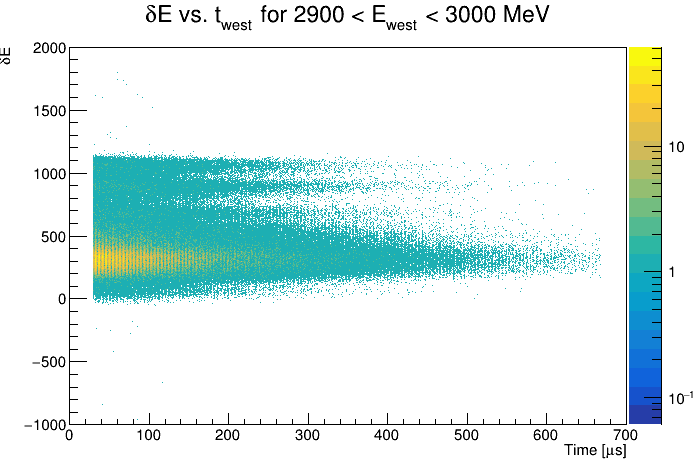

In [52]:
c = r.TCanvas()
hAll.Draw("colz")
c.SetLogz()
c.Draw()

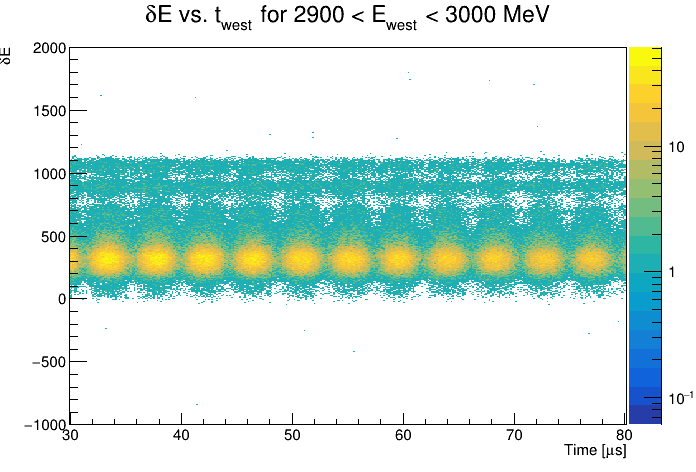

In [53]:
c = r.TCanvas()
hAll.GetXaxis().SetRangeUser(30,80)
hAll.Draw("colz")
c.SetLogz()
c.Draw()

In [54]:
hAll.GetXaxis().SetRangeUser(30,650)
h2 = hAll.ProfileX().Clone("h2")
h2.SetTitle("#deltaE vs. t_{west} for "+str(lowE*100)+" < E_{west} < "+str(highE*100)+" MeV")

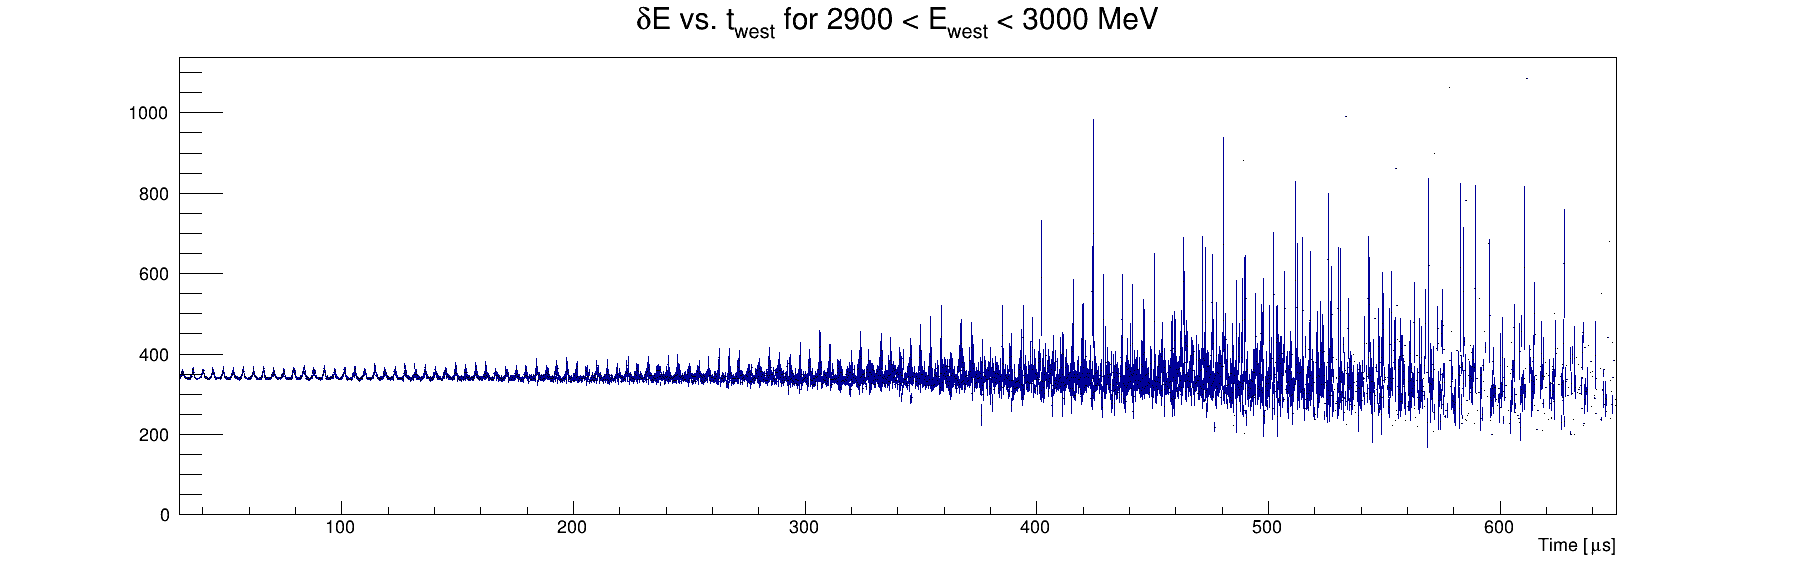

In [55]:
c = r.TCanvas("c","c",1800,600)
h2.Draw()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


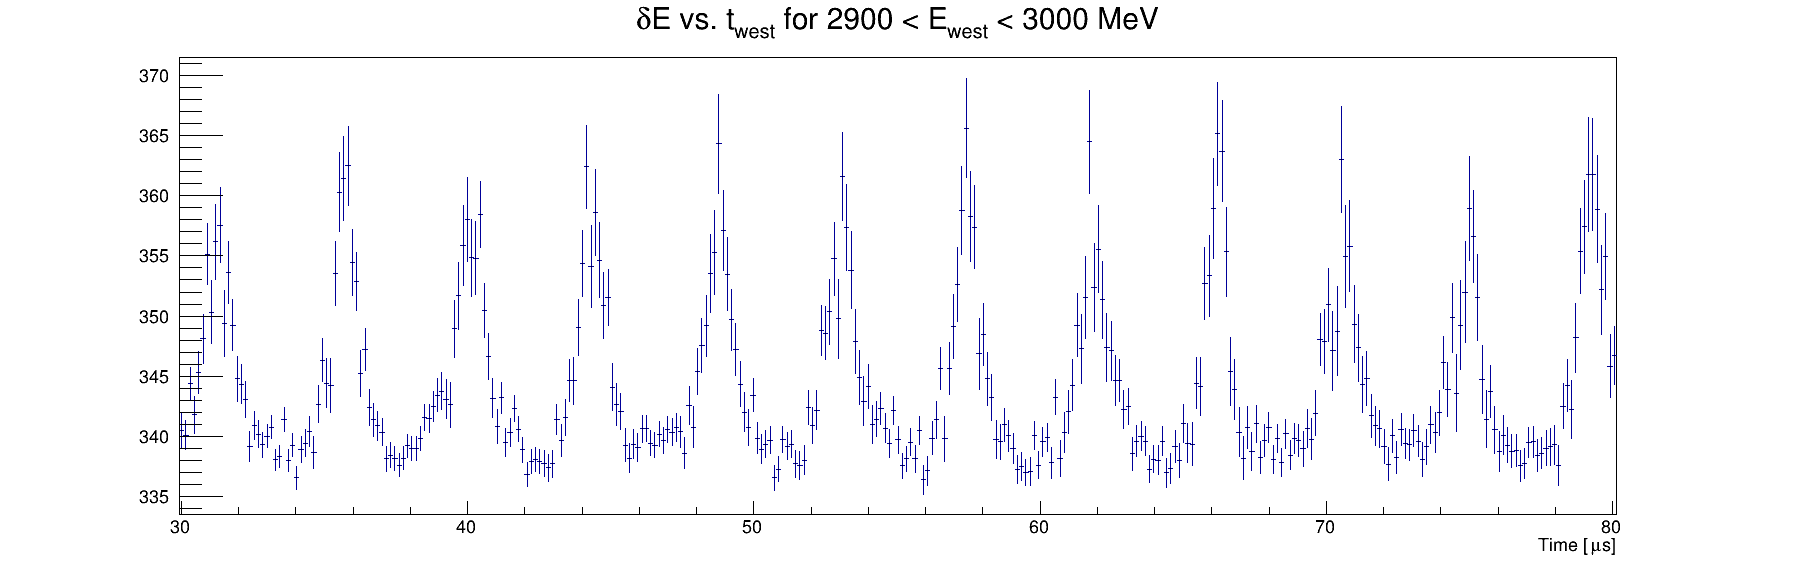

In [56]:
c = r.TCanvas("c","c",1800,600)
h2.GetXaxis().SetRangeUser(30,80)
h2.Draw()
c.Draw()

In [80]:
getBlinded = Blinders(FitType.Omega_a, 'This is my fight song. Blinding my plot song.')
def peak_fit_pileup(x, p):
    R = p[1]
    omega = getBlinded.paramToFreq(R)
    return ( (p[0]*r.TMath.Sin(omega*x[0] + p[2]))#*r.TMath.Exp(-x[0]/p[9]) 
            + p[4]*r.TMath.Sin(p[6]*x[0] + p[5])#*r.TMath.Exp(-x[0]/p[6])  
            + p[3] #+ p[4]*x[0] + p[5]*(x[0] - p[6])**2
           )

func3 = r.TF1("pileup_fit", peak_fit_pileup, 30,200,7)
#func1.SetParNames('A','R','#phi_{1}','+ C', 'm', 'a_{quad}', 'c_{quad}' )
func3.SetParNames('A','R','#phi_{1}','+ C', 'A_{#omega2}', #0-4
                  '#phi_{#omega2}', '#tau_{log}')
func3.SetParameters(0.0001,0,0.6,0.1015,-0.001,100)
#func1.SetParLimits(4,-100000000,-0.0000000000000000001) #avoid divide by zero errors
#func1.SetParLimits(7,1,10**15) #avoid divide by zero errors
#func3.SetParLimits(2,-6.3,6.3)
#func3.SetParLimits(7,-6.3,6.3)
func3.SetLineColor(2)
func3.SetNpx(5000)

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [87]:
getBlinded = Blinders(FitType.Omega_a, 'This is my fight song. Blinding my plot song.')
def peak_fit_sine(x, p):
    R = p[1]
    omega = getBlinded.paramToFreq(R)
    return ( (p[0]*r.TMath.Sin(omega*x[0] + p[2]))#*r.TMath.Exp(-x[0]/p[9]) 
            + p[9]*r.TMath.Sin(2*omega*x[0] + p[10])*r.TMath.Exp(-x[0]/p[5])  
            #+ p[7]*r.TMath.Sin(p[9]*omega*x[0] + p[8])
            + p[3] #+ p[4]*x[0] + p[5]*(x[0] - p[6])**2
            + p[4]*r.TMath.Exp(-x[0]/p[5])
            + p[6]*r.TMath.Sin(p[8]*x[0] + p[7])*r.TMath.Exp(-x[0]/p[5]) 
            #+ p[11]*r.TMath.Sin(p[12]*x[0] + p[13])*r.TMath.Exp(-x[0]/p[5]) 
            #+ p[9]*x[0]
           )

func3 = r.TF1("simplesine_ranges", peak_fit_sine, 30,650,11)
#func1.SetParNames('A','R','#phi_{1}','+ C', 'm', 'a_{quad}', 'c_{quad}' )
func3.SetParNames('A','R','#phi_{1}','+ C', 'A_{log}', #0-4
                  '#tau_{log}', 'A_{VW?}', '#phi_{VW?}', '#omega_{VW?}', 'A_{#omegaa-2}',  #5-9
                  '#phi_{#omegaa-2}') #10-14
func3.SetParName(11,'A_{CBO?}')
func3.SetParName(12, '#omega_{CBO?}')
func3.SetParName(13, '#phi_{CBO?}')
func3.SetParameters(0.0001,0,0.6,0.1015,-0.001,100)
#func1.SetParLimits(4,-100000000,-0.0000000000000000001) #avoid divide by zero errors
#func1.SetParLimits(7,1,10**15) #avoid divide by zero errors
#func3.SetParLimits(2,-6.3,6.3)
#func3.SetParLimits(7,-6.3,6.3)
func3.SetLineColor(2)
func3.SetNpx(5000)

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


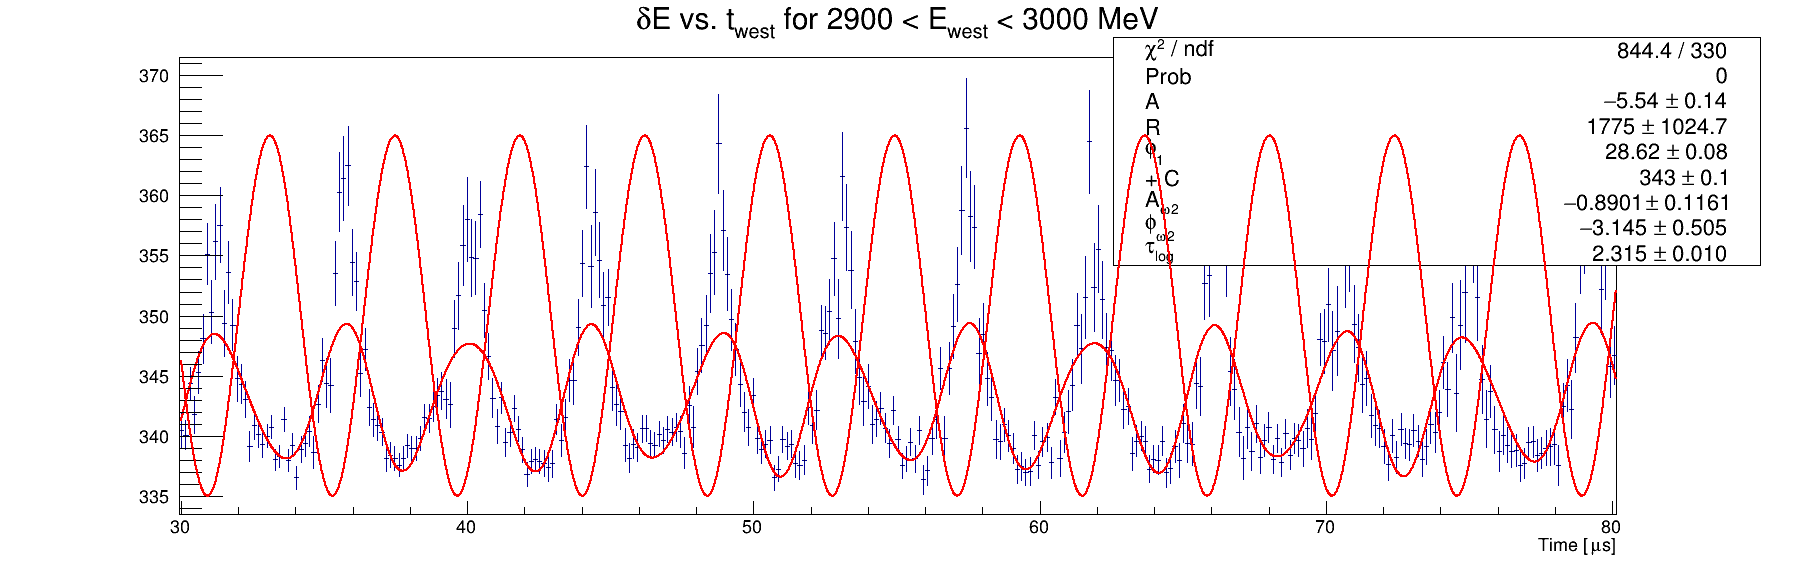

In [88]:
c = r.TCanvas("c","c",1800,600)
h2.Draw()
h2.GetXaxis().SetRangeUser(30,80)

#func3.SetParameters(0.0001,0,0.6,0.07015,0.001,100,-0.000001,0,2.3,1000,0.000000001)
func3.SetParameters(15,0,-2.1,350,5,1.1,2.3)
func3.Draw("SAME")
c.SetLogz()
c.Draw()

 NEW MINIMUM FOUND.  GO BACK TO MINIMIZATION STEP.
                                                  V
                                                  V
                                                  V
                                               VVVVVVV
                                                VVVVV
                                                 VVV
                                                  V

 FUNCTION MUST BE MINIMIZED BEFORE CALLING MINOs     
 FUNCTION MUST BE MINIMIZED BEFORE CALLING MINOs     
 FUNCTION MUST BE MINIMIZED BEFORE CALLING MINOs     
 FUNCTION MUST BE MINIMIZED BEFORE CALLING MINOs     
 FCN=901.071 FROM MINOS     STATUS=FAILURE      6221 CALLS       56350 TOTAL
                     EDM=5.10807e-06    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A            5.51147e+00   1.15866e-01  -1

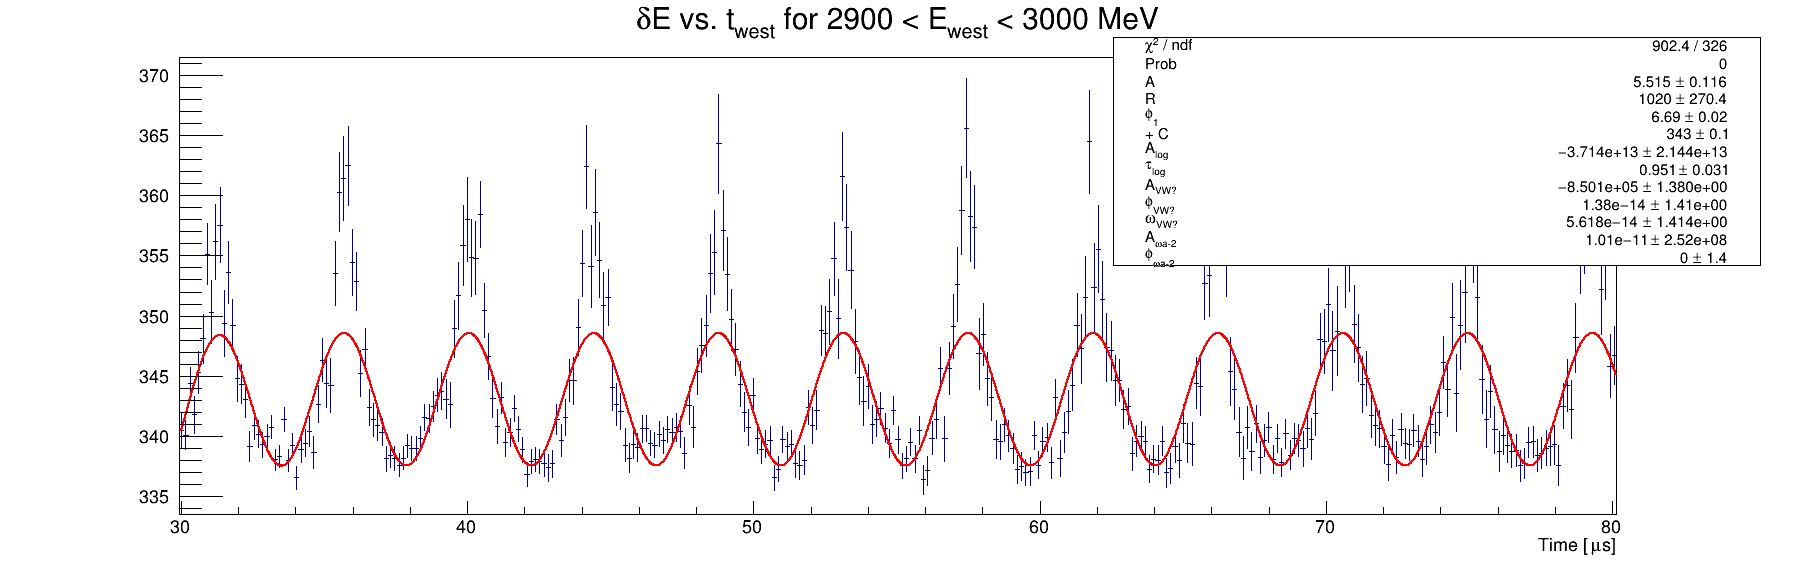

In [89]:
c = r.TCanvas("c","c",1800,600)
h2.Draw()
h2.GetXaxis().SetRangeUser(30,80)

h2.Fit("simplesine_ranges","REMB")
c.SetLogz()
c.Draw()